# MODFLOW FloPy - OBahia

In [1]:
import sys
import os
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

flopy is installed in /home/fernando/.local/lib/python3.7/site-packages/flopy


In [2]:
# Root directory
rootdir = os.path.abspath('.')

# Binaries directory
binsdir = os.path.join(rootdir, 'bins')

# Model directory
modeldir = os.path.join(rootdir, 'alto_rio_grande')

In [3]:
# Load model
model = flopy.modflow.Modflow.load(modeldir + '/br_grande_transiente.nam', exe_name = binsdir + '/mf2005', model_ws = modeldir, version='mf2005')

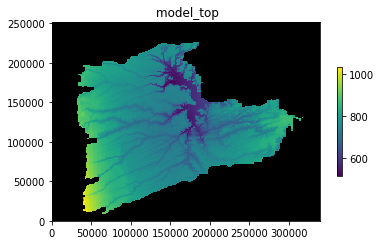

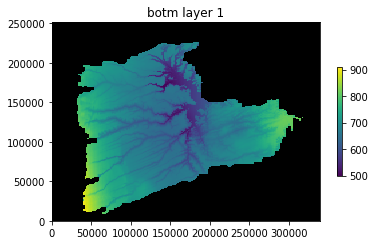

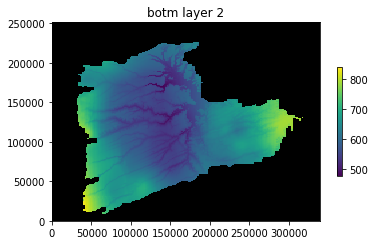

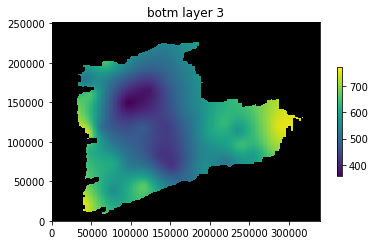

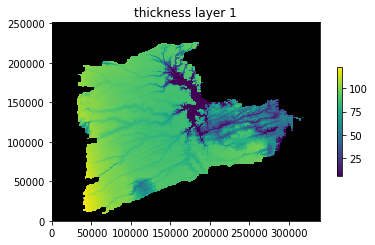

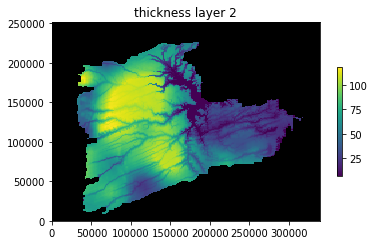

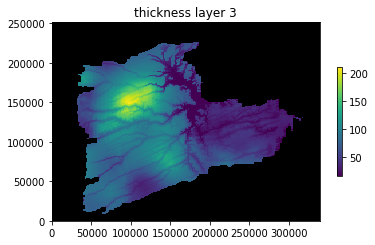

In [4]:
# Plot discharge layers
model.dis.plot()

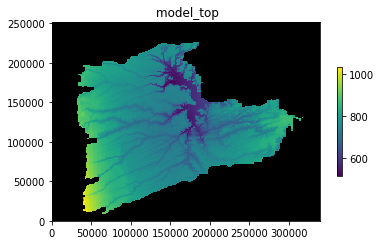

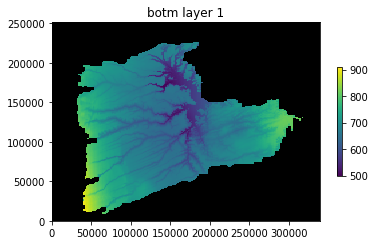

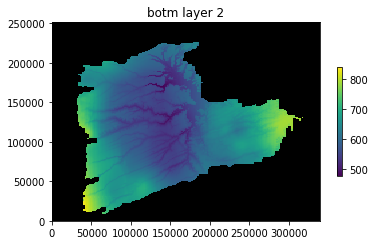

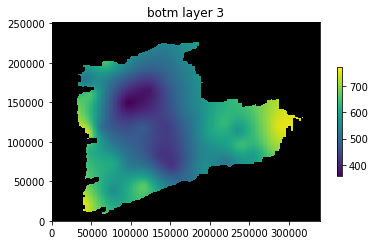

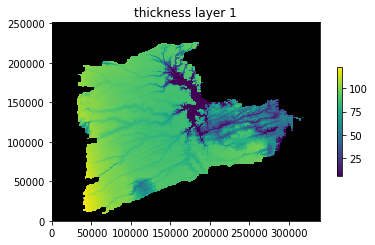

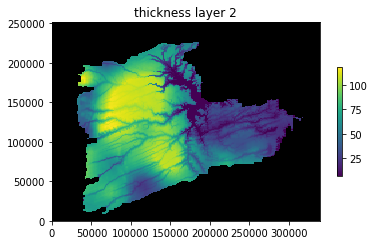

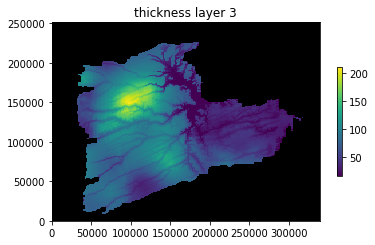

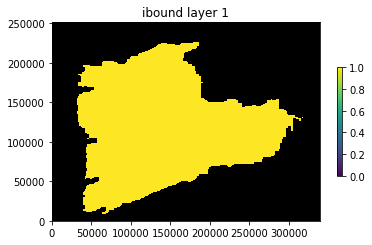

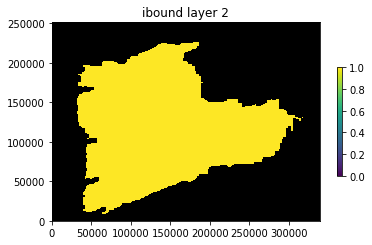

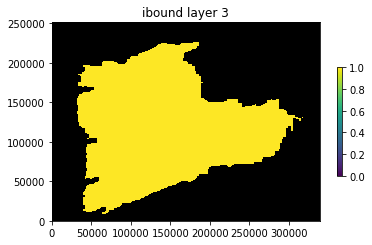

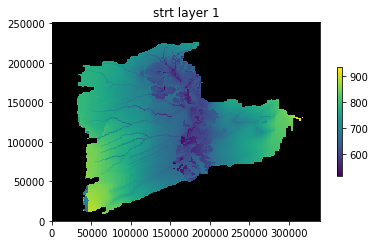

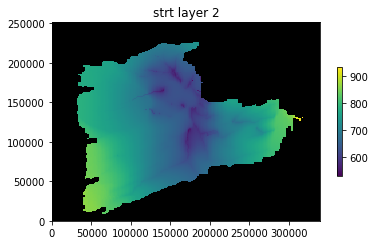

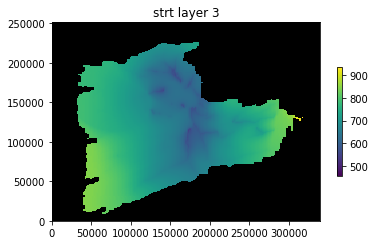

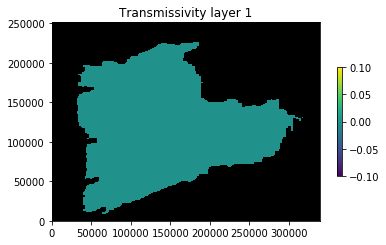

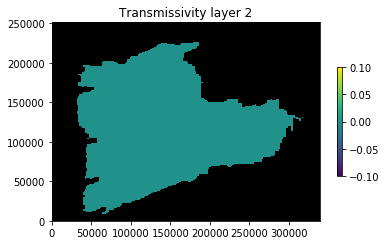

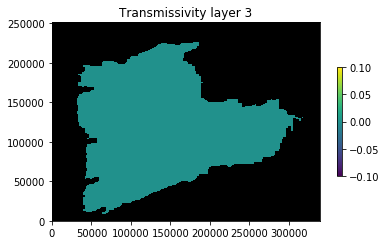

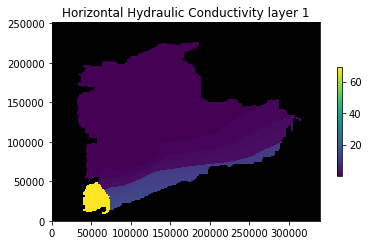

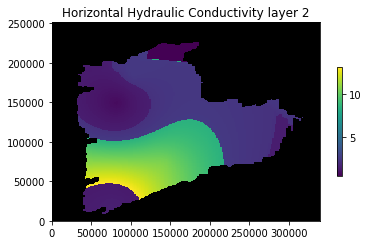

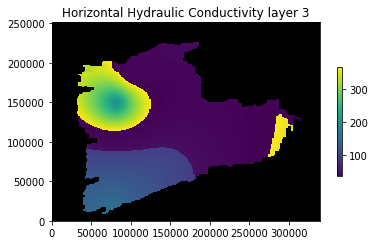

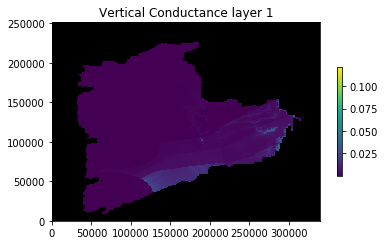

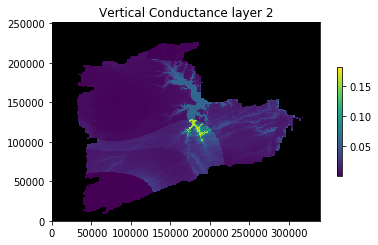

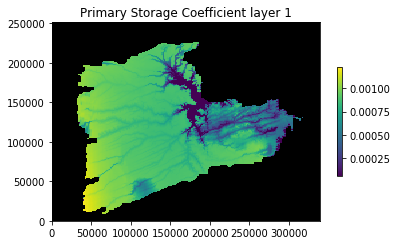

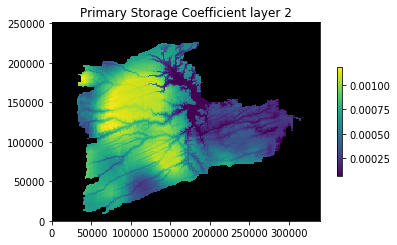

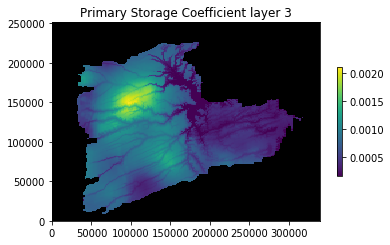

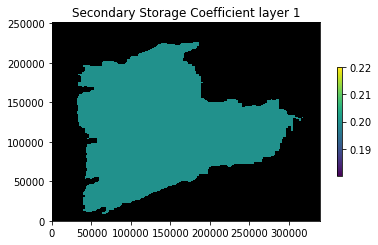

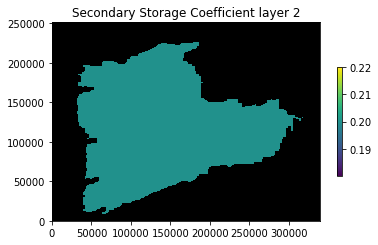

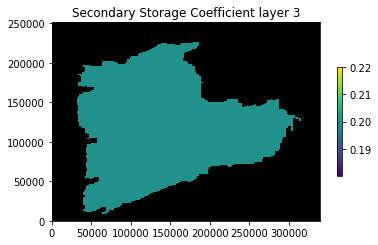

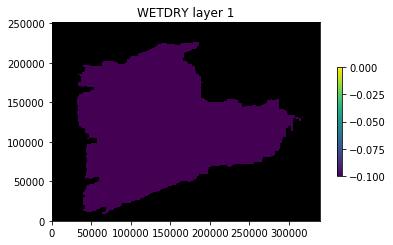

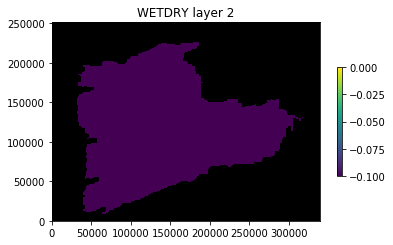

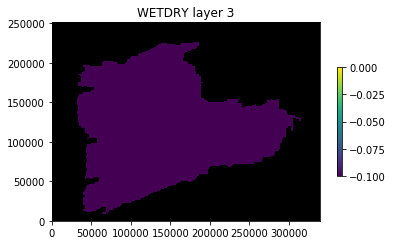

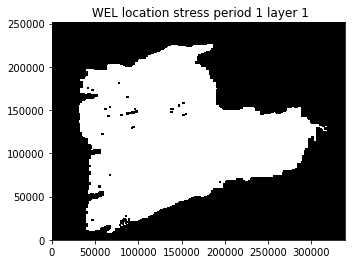

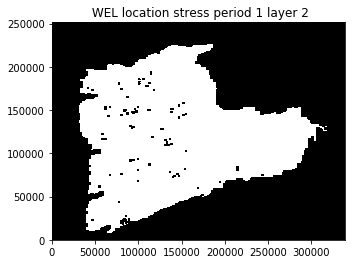

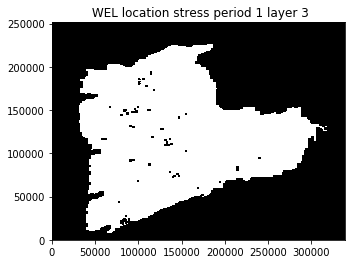

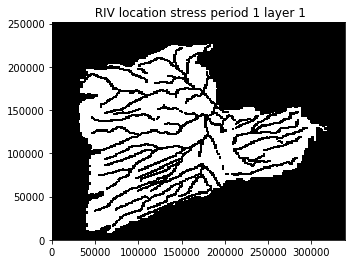

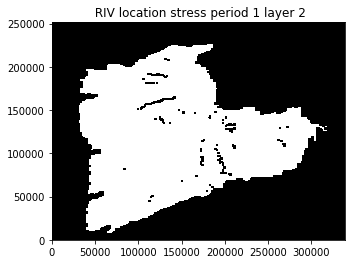

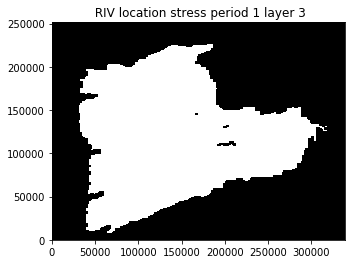

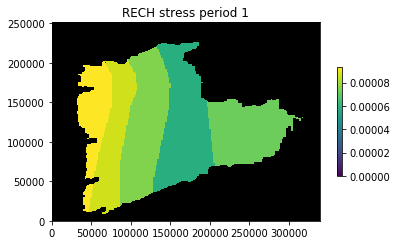

In [5]:
# Plot all layers
model.plot()

In [6]:
# Running MODPATH 6

mp = flopy.modpath.Modpath('detalhe_modpath', 
                           exe_name = binsdir + '/mp6', 
                           modflowmodel = model, 
                           model_ws = modeldir)

mpbas = flopy.modpath.ModpathBas(mp, hnoflo = model.bas6.hnoflo, 
                                 hdry = model.hdry, 
                                 ibound = model.bas6.ibound.array, 
                                 prsity=0.3,   # The porosity array
                                 prsityCB=0.3) # The porosity array for confining beds

sim = mp.create_mpsim(trackdir = 'forward', simtype = 'endpoint', packages = 'RCH')

mp.write_input()
mp.run_model()

mpp = flopy.modpath.Modpath('grande_modpathp', 
                            exe_name = binsdir + '/mp6', 
                            modflowmodel = model, 
                            model_ws = modeldir)

mpbas = flopy.modpath.ModpathBas(mpp, hnoflo = model.bas6.hnoflo, 
                                 hdry = model.hdry, 
                                 ibound = model.bas6.ibound.array, 
                                 prsity=0.3, 
                                 prsityCB=0.3)

FloPy is using the following  executable to run the model: /home/fernando/Documents/workspace/PRODEAGRO/MODFLOW/dados/flopy_obahia/bins/mp6
Processing basic data ...
Checking head file ...
Checking budget file and building index ...
Unable to determine the precision of the budget file


In [7]:
# # Save discharge layers to shapefile
# model.dis.export(os.path.join('shapefiles', 'layers_dis.shp'))

# # Save recharge layers to shapefile
# model.rch.export(os.path.join('shapefiles', 'layers_rch.shp'))

# # Save well layers to shapefile
# model.wel.export(os.path.join('shapefiles', 'layers_well.shp'), sparse=True)

# # Save all layers to shapefile
# model.export(os.path.join('shapefiles', 'layers_all.shp'))

## Plot MODFLOW data using matplotlib

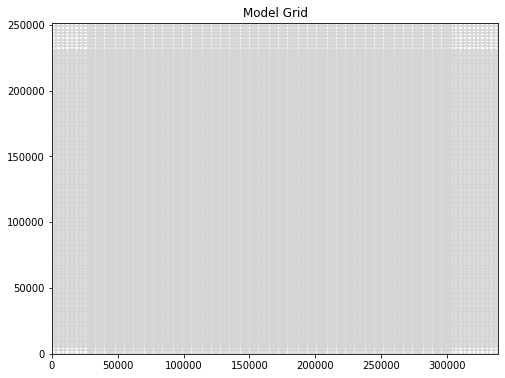

In [8]:
# Set up the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

# Create an instance of the PlotMapView class
mapview = flopy.plot.PlotMapView(model = model)

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = mapview.plot_grid(color = 'lightgrey')

t = ax.set_title("Model Grid")

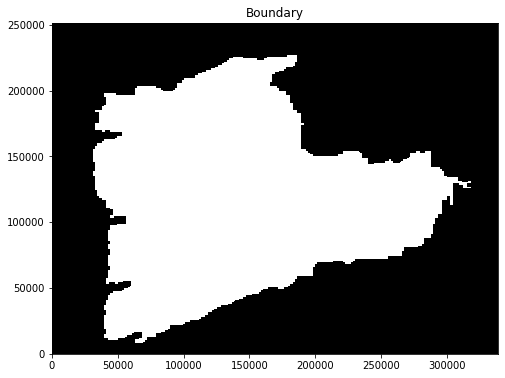

In [9]:
#Boundaries
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

mapview = flopy.plot.PlotMapView(model = model)
quadmesh = mapview.plot_ibound()
t = ax.set_title("Boundary")

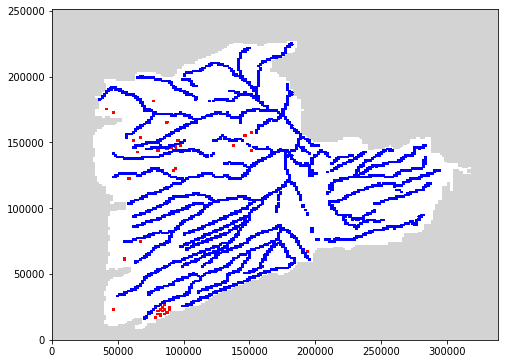

In [10]:
# Rivers and Wells
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1, aspect='equal')

mapview = flopy.plot.PlotMapView(model = model)

ibound = mapview.plot_ibound(color_noflow='lightgrey')

wel = mapview.plot_bc("WEL", color = 'red')
riv = mapview.plot_bc("RIV", color = 'blue')

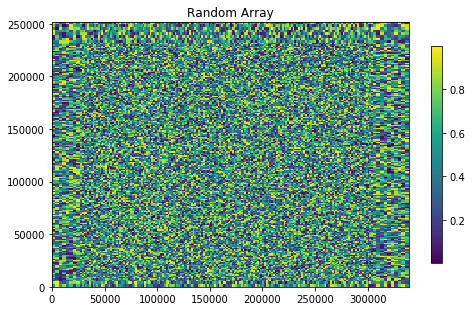

In [11]:
# Example of plotting array

a = np.random.random((model.dis.nrow, model.dis.ncol))

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1, aspect = 'equal')
ax.set_title('Random Array')

mapview = flopy.plot.PlotMapView(model = model, layer=0)
quadmesh = mapview.plot_array(a)

cb = plt.colorbar(quadmesh, shrink = 0.5)

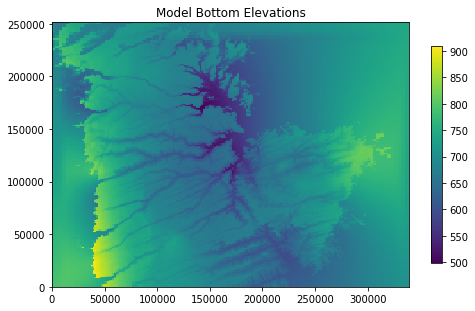

In [12]:
# Plot the model bottom array
a = model.dis.botm.array

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1, aspect = 'equal')
ax.set_title('Model Bottom Elevations')

mapview = flopy.plot.PlotMapView(model = model, layer = 0)
quadmesh = mapview.plot_array(a)

cb = plt.colorbar(quadmesh, shrink = 0.5)

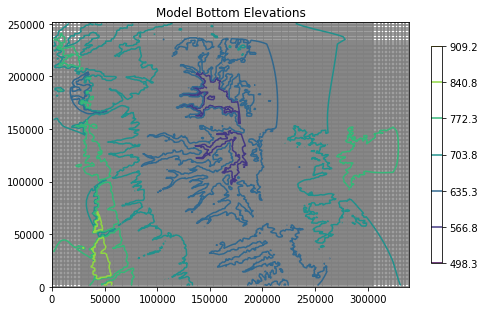

In [13]:
# Contour the model bottom array
a = model.dis.botm.array

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1, aspect = 'equal')
ax.set_title('Model Bottom Elevations')

mapview = flopy.plot.PlotMapView(model = model, layer=0)
linecollection = mapview.plot_grid()
contour_set = mapview.contour_array(a)

plt.colorbar(contour_set, shrink = 0.5);

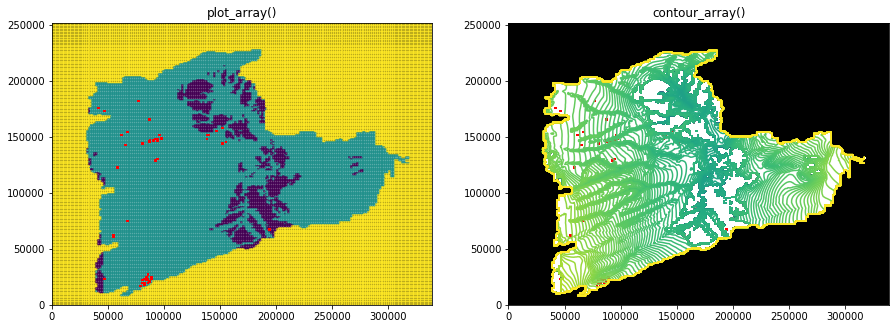

In [14]:
fname = os.path.join(modeldir, 'br_grande_transiente.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()

levels = np.arange(0, 1000, 5)

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(1, 2, 1, aspect = 'equal')
ax.set_title('plot_array()')

mapview = flopy.plot.PlotMapView(model = model)
quadmesh = mapview.plot_ibound()
quadmesh = mapview.plot_array(head, masked_values=[999.], alpha = 0.5)
mapview.plot_bc("WEL")

ax = fig.add_subplot(1, 2, 2, aspect = 'equal')
ax.set_title('contour_array()')

mapview = flopy.plot.PlotMapView(model = model)
quadmesh = mapview.plot_ibound()

contour_set = mapview.contour_array(head, masked_values = [999.], levels = levels)
mapview.plot_bc("WEL")

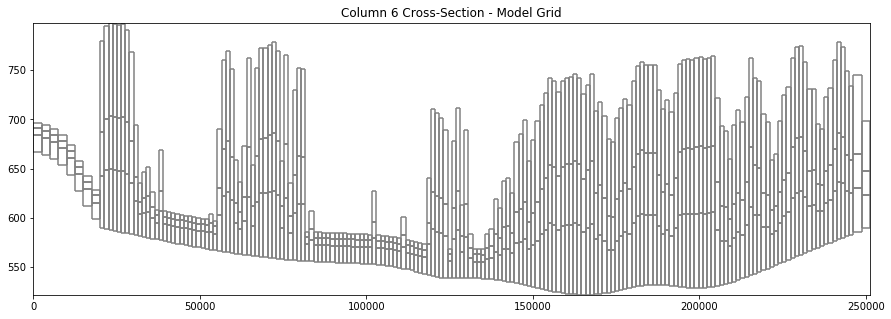

In [15]:
#Cross section

# First step is to set up the plot
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(1, 1, 1)

# Next we create an instance of the PlotCrossSection class
xsect = flopy.plot.PlotCrossSection(model = model, line = {'Column': 100})

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = xsect.plot_grid()
t = ax.set_title('Column 6 Cross-Section - Model Grid')

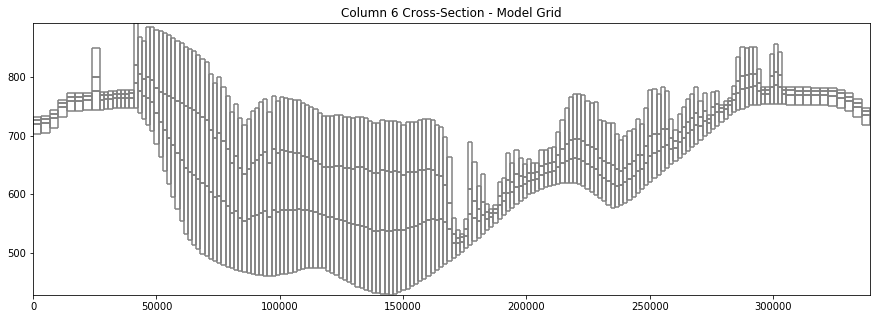

In [16]:
#Cross section

# First step is to set up the plot
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(1, 1, 1)

# Next we create an instance of the PlotCrossSection class
xsect = flopy.plot.PlotCrossSection(model = model, line = {'Row': 100})

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = xsect.plot_grid()
t = ax.set_title('Column 6 Cross-Section - Model Grid')

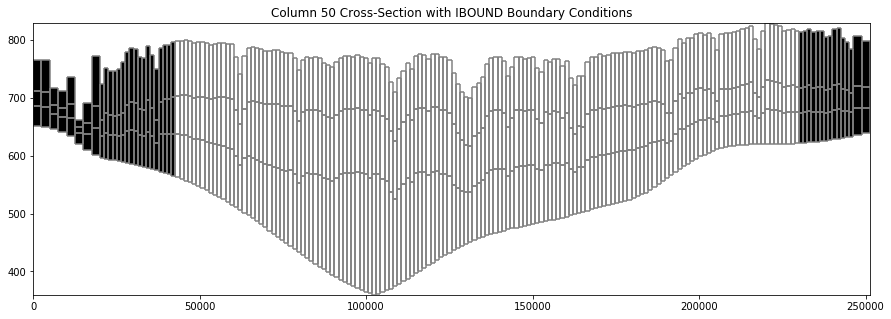

In [17]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

xsect = flopy.plot.PlotCrossSection(model = model, line = {'Column': 50})
patches = xsect.plot_ibound()
linecollection = xsect.plot_grid()
t = ax.set_title('Column 50 Cross-Section with IBOUND Boundary Conditions')

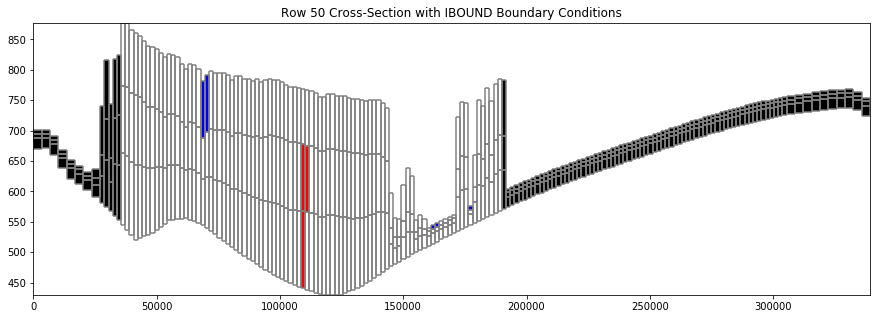

In [18]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

xsect = flopy.plot.PlotCrossSection(model = model, line = {'Row': 50})
patches = xsect.plot_bc('RIV', color='blue')
patches = xsect.plot_bc('WEL', color='red')
patches = xsect.plot_ibound()
linecollection = xsect.plot_grid()
t = ax.set_title('Row 50 Cross-Section with IBOUND Boundary Conditions')

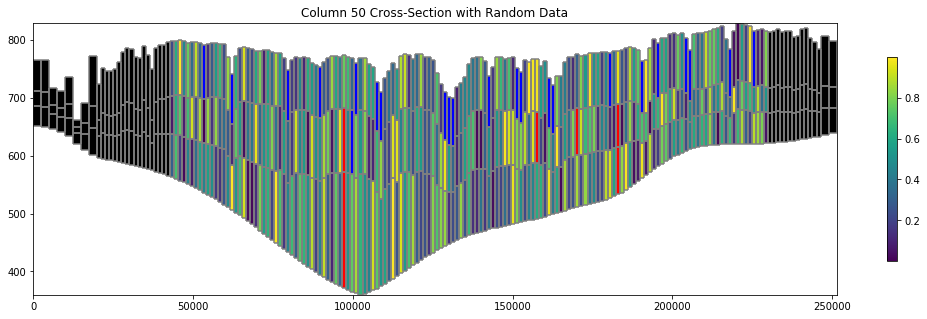

In [19]:
# Create a random array and plot it
a = np.random.random((model.dis.nlay, model.dis.nrow, model.dis.ncol))

fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(1, 1, 1)
xsect = flopy.plot.PlotCrossSection(model = model, line={'Column': 50})
csa = xsect.plot_array(a)

patches = xsect.plot_bc('RIV', color='blue')
patches = xsect.plot_bc('WEL', color='red')
patches = xsect.plot_ibound()
linecollection = xsect.plot_grid()
t = ax.set_title('Column 50 Cross-Section with Random Data')
cb = plt.colorbar(csa, shrink=0.75)

In [20]:
# Layer Propertie Flow Package
lpf = flopy.modflow.ModflowLpf(model)

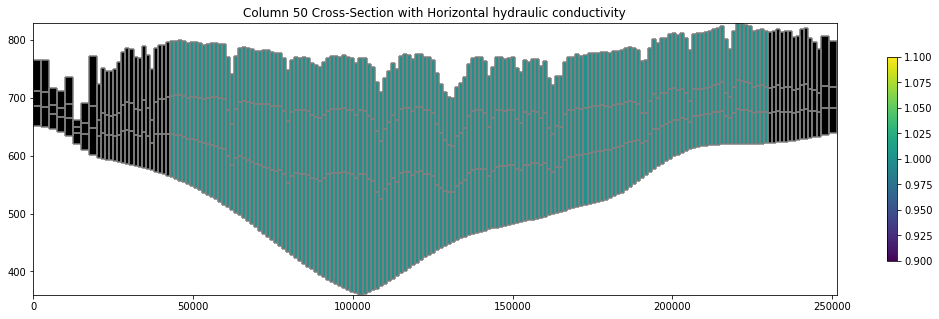

In [21]:
# plot the horizontal hydraulic conductivities
a = lpf.hk.array

fig = plt.figure(figsize = (18, 5))
ax = fig.add_subplot(1, 1, 1)
xsect = flopy.plot.PlotCrossSection(model = model, line = {'Column': 50})

csa = xsect.plot_array(a)
patches = xsect.plot_ibound()
linecollection = xsect.plot_grid()

t = ax.set_title('Column 50 Cross-Section with Horizontal hydraulic conductivity')
cb = plt.colorbar(csa, shrink=0.75)

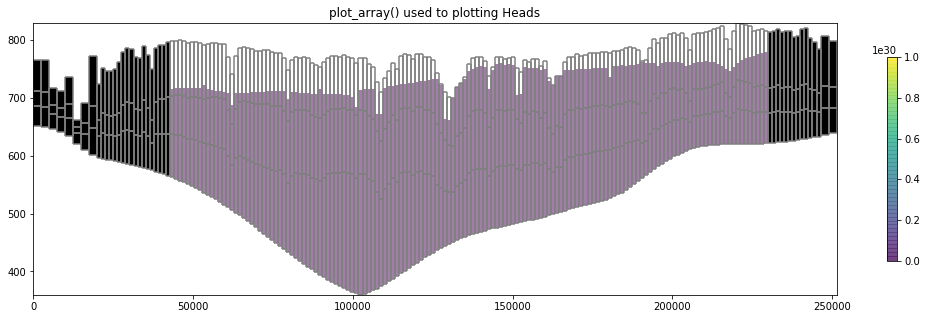

In [22]:
# Heads
fname = os.path.join(modeldir, 'br_grande_transiente.hds')
hdobj = flopy.utils.HeadFile(fname)
head = hdobj.get_data()

fig = plt.figure(figsize = (18, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('plot_array() used to plotting Heads')
xsect = flopy.plot.PlotCrossSection(model = model, line = {'Column': 50})
pc = xsect.plot_array(head, masked_values=[999.], head = head, alpha=0.5)

patches = xsect.plot_ibound(head = head)
linecollection = xsect.plot_grid()
cb = plt.colorbar(pc, shrink=0.75)

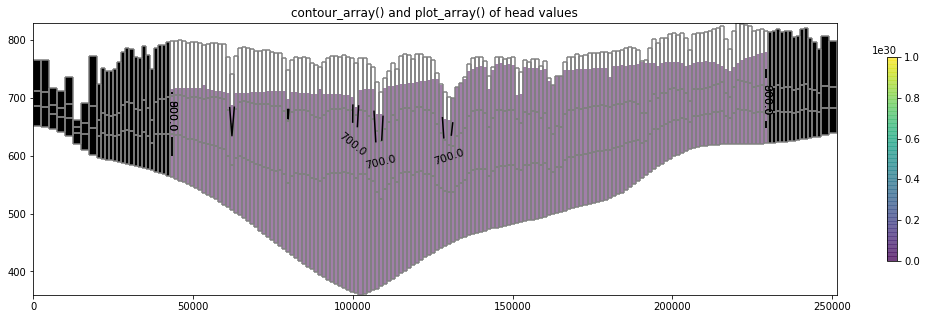

In [23]:
# contour array on top of heads
levels = np.arange(0, 1000, 100)

fig = plt.figure(figsize = (18, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('contour_array() and plot_array() of head values')

# instantiate the PlotCrossSection object
xsect = flopy.plot.PlotCrossSection(model = model, line = {'Column': 50})

# plot the head array and model grid
pc = xsect.plot_array(head, masked_values = [999.], head = head, alpha = 0.5)
linecollection = xsect.plot_grid()

# do black contour lines of the head array
contour_set = xsect.contour_array(head, masked_values = [999.], head = head, levels = levels, colors='k')
plt.clabel(contour_set, fmt = '%.1f', colors = 'k', fontsize = 11)

patches = xsect.plot_ibound(head = head)
cb = plt.colorbar(pc, shrink = 0.75)

In [24]:
# Test running model (doesn't work yet)
success, mfoutput = model.run_model(silent=False, pause=False, report=True)

FloPy is using the following  executable to run the model: /home/fernando/Documents/workspace/PRODEAGRO/MODFLOW/dados/flopy_obahia/bins/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: br_grande_transiente.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/02/06 18:27:00



## Parameterizing a model from scratch

In [25]:
# Model domain and grid definition
Lx = 1000.
Ly = 1000.
ztop = 10.
zbot = -50.
nlay = 1
nrow = 10
ncol = 10
delr = Lx / ncol
delc = Ly / nrow
delv = (ztop - zbot) / nlay
botm = np.linspace(ztop, zbot, nlay + 1)
hk = 1.
vka = 1.
sy = 0.1
ss = 1.e-4
laytyp = 1

# Variables for the BAS package
# Note that changes from the previous tutorial!
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32)
strt = 10. * np.ones((nlay, nrow, ncol), dtype=np.float32)

In [26]:
# Time step parameters
nper = 3
perlen = [1, 100, 100]
nstp = [1, 100, 100]
steady = [True, False, False]

In [27]:
# Flopy objects
modelname = 'test_model'
mf = flopy.modflow.Modflow(modelname, exe_name= binsdir + '/mf2005')
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=ztop, botm=botm[1:],
                               nper=nper, perlen=perlen, nstp=nstp, steady=steady)
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, vka=vka, sy=sy, ss=ss, laytyp=laytyp, ipakcb=53)
pcg = flopy.modflow.ModflowPcg(mf)

In [28]:
# Make list for stress period 1
stageleft = 10.
stageright = 10.
bound_sp1 = []
for il in range(nlay):
    condleft = hk * (stageleft - zbot) * delc
    condright = hk * (stageright - zbot) * delc
    for ir in range(nrow):
        bound_sp1.append([il, ir, 0, stageleft, condleft])
        bound_sp1.append([il, ir, ncol - 1, stageright, condright])
print('Adding ', len(bound_sp1), 'GHBs for stress period 1.')

# Make list for stress period 2
stageleft = 10.
stageright = 0.
condleft = hk * (stageleft - zbot) * delc
condright = hk * (stageright - zbot) * delc
bound_sp2 = []
for il in range(nlay):
    for ir in range(nrow):
        bound_sp2.append([il, ir, 0, stageleft, condleft])
        bound_sp2.append([il, ir, ncol - 1, stageright, condright])
print('Adding ', len(bound_sp2), 'GHBs for stress period 2.')

# We do not need to add a dictionary entry for stress period 3.
# Flopy will automatically take the list from stress period 2 and apply it
# to the end of the simulation, if necessary
stress_period_data = {0: bound_sp1, 1: bound_sp2}

# Create the flopy ghb object
ghb = flopy.modflow.ModflowGhb(mf, stress_period_data=stress_period_data)

Adding  20 GHBs for stress period 1.
Adding  20 GHBs for stress period 2.


In [29]:
# Create the well package
# Remember to use zero-based layer, row, column indices!
pumping_rate = -100.
wel_sp1 = [[0, nrow/2 - 1, ncol/2 - 1, 0.]]
wel_sp2 = [[0, nrow/2 - 1, ncol/2 - 1, 0.]]
wel_sp3 = [[0, nrow/2 - 1, ncol/2 - 1, pumping_rate]]
stress_period_data = {0: wel_sp1, 1: wel_sp2, 2: wel_sp3}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [30]:
stress_period_data = {}
for kper in range(nper):
    for kstp in range(nstp[kper]):
        stress_period_data[(kper, kstp)] = ['save head',
                                            'save drawdown',
                                            'save budget',
                                            'print head',
                                            'print budget']
oc = flopy.modflow.ModflowOc(mf, stress_period_data=stress_period_data,
                             compact=True)

In [31]:
# Write the model input files
mf.write_input()

# Run the model
success, mfoutput = mf.run_model(silent=False, pause=False, report=True)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

FloPy is using the following  executable to run the model: /home/fernando/Documents/workspace/PRODEAGRO/MODFLOW/dados/flopy_obahia/bins/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: test_model.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2020/02/06 18:27:08

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     6    Ground-Water Flow Eqn.

Levels:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Extent:  (50.0, 950.0, 50.0, 950.0)
*****Processing time:  1.0
Head statistics
  min:  10.0
  max:  10.0
  std:  0.0
*****Processing time:  101.0
Head statistics
  min:  0.025931068
  max:  9.998436
  std:  3.2574987
*****Processing time:  201.0
Head statistics
  min:  0.018019998
  max:  9.994541
  std:  3.1899076


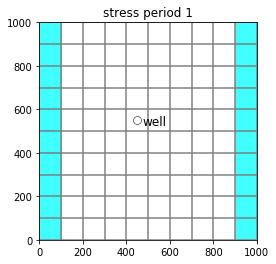

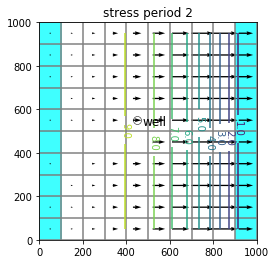

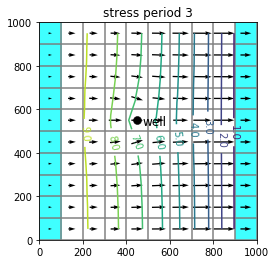

In [36]:
# Imports
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

# Create the headfile and budget file objects
headobj = bf.HeadFile(modelname + '.hds')
times = headobj.get_times()
cbb = bf.CellBudgetFile(modelname + '.cbc')

# Setup contour parameters
levels = np.linspace(0, 10, 11)
extent = (delr / 2., Lx - delr / 2., delc / 2., Ly - delc / 2.)
print('Levels: ', levels)
print('Extent: ', extent)

# Well point
wpt = ((float(ncol / 2) - 0.5) * delr, (float(nrow / 2 - 1) + 0.5) * delc)
wpt = (450., 550.)

# Make the plots
mytimes = [1.0, 101.0, 201.0]
for iplot, time in enumerate(mytimes):
    print('*****Processing time: ', time)
    head = headobj.get_data(totim=time)
    #Print statistics
    print('Head statistics')
    print('  min: ', head.min())
    print('  max: ', head.max())
    print('  std: ', head.std())

    # Extract flow right face and flow front face
    frf = cbb.get_data(text='FLOW RIGHT FACE', totim=time)[0]
    fff = cbb.get_data(text='FLOW FRONT FACE', totim=time)[0]

    #Create the plot
    f = plt.figure()
    plt.subplot(1, 1, 1, aspect='equal')
    plt.title('stress period ' + str(iplot + 1))


    pmv = flopy.plot.PlotMapView(model=mf, layer=0)
    qm = pmv.plot_ibound()
    lc = pmv.plot_grid()
    qm = pmv.plot_bc('GHB', alpha=0.5)
    cs = pmv.contour_array(head, levels=levels)
    plt.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')
    quiver = pmv.plot_discharge(frf, fff, head=head)


    mfc = 'None'
    if (iplot + 1) == len(mytimes):
        mfc='black'
    plt.plot(wpt[0], wpt[1], lw=0, marker='o', markersize=8,
             markeredgewidth=0.5,
             markeredgecolor='black', markerfacecolor=mfc, zorder=9)
    plt.text(wpt[0] + 25, wpt[1] - 25, 'well', size=12, zorder=12)
    plt.savefig('tutorial2-{}.png'.format(iplot))

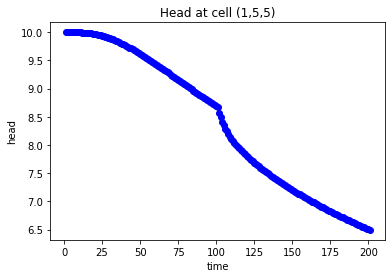

In [37]:
# Plot the head versus time
idx = (0, int(nrow / 2) - 1, int(ncol / 2) - 1)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'bo-')
plt.savefig('tutorial2-ts.png')